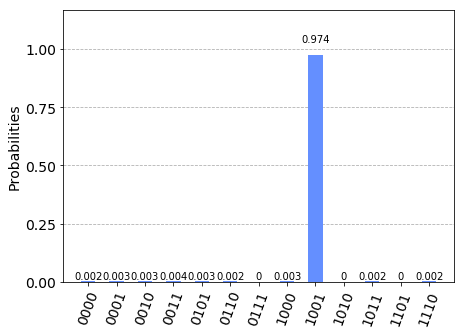

In [4]:
# (C) Copyright Renata Wong 2020.
# Grover's algorithm for finding string 1001 with 5 qubits.

from qiskit import *

w = QuantumRegister(4, 'w')
s = QuantumRegister(1, 's')
c = ClassicalRegister(4, 'c')
qc = QuantumCircuit(w,s,c)

for i in range(0,4):
    qc.h(w[i])

# Executing Grover's iteration 3 times
for j in range(0,3):
    # the oracle
    qc.x(w[1])
    qc.x(w[2])
    qc.ccx(w[2],w[3],s[0])
    qc.h(w[0])
    qc.ccx(s[0],w[1],w[0])
    qc.h(w[0])
    # uncompute
    qc.ccx(w[2],w[3],s[0])
    qc.x(w[2])
    qc.x(w[1])

    # the diffusion operator
    for i in range(0,4):
        qc.h(w[i])
        qc.x(w[i])
        
    qc.ccx(w[0],w[1],s[0])
    qc.h(w[3])
    qc.ccx(s[0],w[2],w[3])
    # uncompute
    qc.h(w[3])
    qc.ccx(w[0],w[1],s[0])

    for i in range(0,4):
        qc.x(w[i])
        qc.h(w[i])  

qc.measure(w,c)

simulator = Aer.get_backend('qasm_simulator')
result = execute(qc,backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)